In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

(-1.213466322089647,
 1.2428686144996857,
 -1.1901742197121508,
 1.2081070479740401)

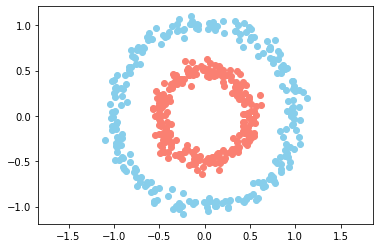

In [2]:
#Crear el data set
n = 500 #Numero de datos(filas)
p = 2 #numero de atributos (columnas)
X,Y = make_circles(n_samples=n,factor=0.5,noise=0.05) #X = input, Y = Outpu, factor es la distancia entre los circulos (inversa)

Y= Y[:,np.newaxis]

plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1],c="skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1],c="salmon")
plt.axis("equal")

#Hasta este momento hemos creado la nube de puntos que deseamos analisar.

In [0]:
#Se debe de crear la red por capas
#Clase de capa de red
class neural_layer():
  def __init__(self,n_conn,n_neur,act_f): #numero de conexionea, numero de neuronas, funcion de activacion
    self.act_f = act_f

    self.b = np.random.rand(1,n_neur) * 2 - 1 #np nos da el valor entre 0-1, pero como es una 'tanh' es de -1 -> 1, so la multiplicamos por dos y le restamos uno
    self.W = np.random.rand(n_conn,n_neur)


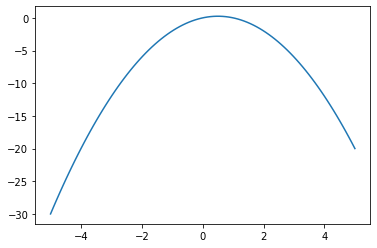

In [4]:
#Definimos las funcinones de activacion
sigm = (lambda x: 1 / (1 + np.e** (-x)),
        lambda x: x * (1-x))

_x = np.linspace(-5,5,100)
plt.plot(_x,sigm[1](_x))

In [0]:
#Creamos la primer capa (layer 0)
l0 = neural_layer(p,4,sigm)
l1 = neural_layer(4,8,sigm)
#...
def create_nn(topology,act_f):
  nn = []
  for l,layer in enumerate(topology[:-1]): #Recorre todo el vector menos el ultimo valor
    nn.append(neural_layer(topology[l],topology[l+1],act_f))
  return nn


In [8]:
topology = [p,4,8,1]
neural_net = create_nn(topology,sigm) #Creamos las cuatro capas

l2_cost = (lambda Yp,Yr:np.mean((Yp-Yr)**2), #Funcion de coste, es el cuadratico medio
           lambda Yp,Yr: (Yp-Yr)) #La derivada

def train(neural_net,X,Y,l2_cost,lr = 0.5,train=True): #lr = 0.5
  out = [(None,X)]
  #Forward Pass
  for l,layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z,a))  
  #print(out[-1][1])

  if train:
    #Backward pass
    deltas = []
    for l in reversed(range(0,len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1: #Estamos en la ultima capa
        #calcular delta ultima capa
        deltas.insert(0,l2_cost[1](a,Y) * neural_net[l].act_f[1](a))
      else:
        #calcular delta para capa previa
        deltas.insert(0,deltas[0] @  _W.T * neural_net[l].act_f[1](a))

      _W =  neural_net[l].W

      #Gradiant descent 
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0],axis = 0,keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  
  return out[-1][1]

train(neural_net,X,Y,l2_cost,0.5)

array([[0.93107792],
       [0.93412781],
       [0.9234083 ],
       [0.93857515],
       [0.95087426],
       [0.95250719],
       [0.94580352],
       [0.92109443],
       [0.95272042],
       [0.93135911],
       [0.93288952],
       [0.93226729],
       [0.95371826],
       [0.90507802],
       [0.95298658],
       [0.94510889],
       [0.9463394 ],
       [0.93818622],
       [0.93851445],
       [0.8993937 ],
       [0.94787268],
       [0.90109745],
       [0.95096424],
       [0.90753661],
       [0.92681363],
       [0.94184978],
       [0.93957185],
       [0.93087437],
       [0.94548024],
       [0.94183959],
       [0.94961276],
       [0.92786098],
       [0.94873769],
       [0.93620717],
       [0.9384623 ],
       [0.93478072],
       [0.90007626],
       [0.92458899],
       [0.92776563],
       [0.94177274],
       [0.92252941],
       [0.91258773],
       [0.92372883],
       [0.92215789],
       [0.92424583],
       [0.92786414],
       [0.9262858 ],
       [0.932

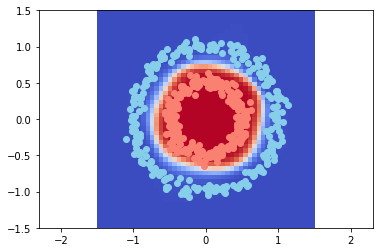

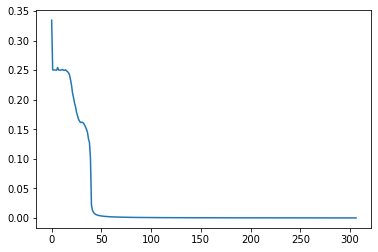

KeyboardInterrupt: ignored

In [13]:
#Implementacion de la red
import time 
from IPython.display import clear_output

neural_n = create_nn(topology,sigm)

loss = []

for i in range(25000):
  pY = train(neural_n,X,Y,l2_cost,lr=0.05)
  if i % 25 == 0:
    print(pY)
    loss.append(l2_cost[0](pY,Y))

    res = 50 #Resolución de la imagen
    _x0 = np.linspace(-1.5,1.5,res)
    _x1 = np.linspace(-1.5,1.5,res)
    _Y = np.zeros((res,res))

    for i0,x0 in enumerate(_x0):
      for i1,x1 in enumerate(_x1):
        _Y[i0,i1] = train(neural_n,np.array([[x0,x1]]),Y,l2_cost,train = False)[0][0]

    plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
      
    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.3)